# Classification Model- CatBoost

### Written by: Rodrigo Escandon

# Executive Summary

A Natural Language Processing model was developed using Machine Learning to evaluate two classifications of text messages. This model was then used to predict which classification (user) wrote each text message. This model was created using Python (CatBoost, Pandas, Scikit-Learn and Seaborn) to structure, analyze and visualize the data set.

## Model Performance

The accuracy of the model predicting which classification (user) wrote each message for the testing set was calculated at 97%. 
In this example the model that was used was CatBoost. This tree ensemble model did well predicting the data set increasing its f1-score perfomance about the Naive Bayes model.

In [1]:
import pandas as pd
import numpy as np
import webbrowser

In [3]:
#Directing jupyter to website were that data is located and will be downloaded to folder
website='https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection'
webbrowser.open(website)

True

In [2]:
#Loading data using pandas 
messages =pd.read_csv('SMSSpamCollection',sep='\t',names=['labels','message'])

In [3]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#Data exploration and visualization
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [5]:
messages['length']=messages['message'].apply(len)
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

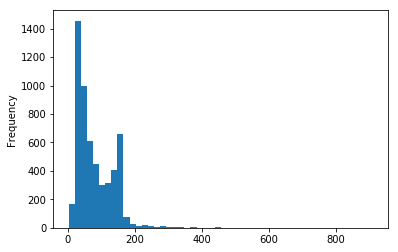

In [7]:
messages['length'].plot(bins=50,kind='hist')

In [8]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [9]:
#Determining the longest message in this data set
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029675402160>,
      dtype=object)

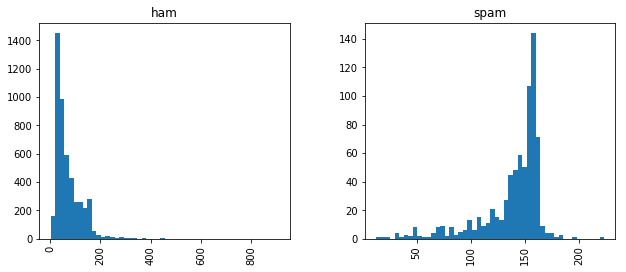

In [10]:
messages.hist(column='length',by='labels',bins=50,figsize=(10,4))

In [11]:
#Initiation of Text analyze
import string

In [12]:
#Removing punctuations
#Example
mess='Sample message! Notice it has punctuation.'

In [13]:
nopunc=[char for char in mess if char not in string.punctuation]

In [14]:
nopunc=''.join(nopunc)

In [15]:
nopunc

'Sample message Notice it has punctuation'

In [16]:
#Removing stop words
from nltk.corpus import stopwords

In [17]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [18]:
clean_mess=[word for word in nopunc.split()if word.lower() not in stopwords.words('english')]

In [19]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [20]:
#Creating function to run the loaded text
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split()if word.lower() not in stopwords.words('english')]

In [21]:
#Removing punctuations and stopwords
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [22]:
#Converting string to vector
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
bow_transformer=CountVectorizer(analyzer=text_process)

In [24]:
bow_transformer.fit(messages['message'])

CountVectorizer(analyzer=<function text_process at 0x000002967688DD90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [25]:
message4=messages['message'][3]

In [26]:
print(message4)

U dun say so early hor... U c already then say...


In [27]:
bow4=bow_transformer.transform([message4])

In [28]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [29]:
print(bow_transformer.get_feature_names()[9554])

say


In [30]:
messages_bow=bow_transformer.transform(messages['message'])

In [31]:
#Term Frequency and Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(analyzer=text_process)
tfidf_transformer=tfidf.fit(messages['message'])

In [32]:
messages['labels_cat']=np.where(messages['labels']=='ham',1,0)

In [33]:
#Splitting data into train/test
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['labels_cat'],test_size=0.2,random_state=123)
label_test=pd.Series(label_test).reset_index(drop=True)

In [34]:
#Text size for train and test sets
print(len(msg_train),len(msg_test))

4457 1115


In [35]:
msg_train=tfidf_transformer.transform(msg_train)
msg_test=tfidf_transformer.transform(msg_test)

In [36]:
#Training the model 
import catboost

In [37]:
spam_detect_model=catboost.CatBoostClassifier(iterations=3000,learning_rate=0.01,depth=8)

In [38]:
%%time
spam_detect_model.fit(msg_train,label_train)

0:	learn: 0.6837641	total: 434ms	remaining: 21m 40s
1:	learn: 0.6750241	total: 603ms	remaining: 15m 3s
2:	learn: 0.6663901	total: 812ms	remaining: 13m 31s
3:	learn: 0.6571349	total: 991ms	remaining: 12m 22s
4:	learn: 0.6489188	total: 1.17s	remaining: 11m 42s
5:	learn: 0.6411148	total: 1.35s	remaining: 11m 11s
6:	learn: 0.6333163	total: 1.52s	remaining: 10m 51s
7:	learn: 0.6240547	total: 1.69s	remaining: 10m 31s
8:	learn: 0.6156092	total: 1.87s	remaining: 10m 20s
9:	learn: 0.6078807	total: 2.05s	remaining: 10m 11s
10:	learn: 0.6011649	total: 2.22s	remaining: 10m 4s
11:	learn: 0.5942898	total: 2.4s	remaining: 9m 56s
12:	learn: 0.5874718	total: 2.57s	remaining: 9m 51s
13:	learn: 0.5803126	total: 2.74s	remaining: 9m 44s
14:	learn: 0.5725579	total: 2.92s	remaining: 9m 41s
15:	learn: 0.5644014	total: 3.09s	remaining: 9m 36s
16:	learn: 0.5570027	total: 3.27s	remaining: 9m 33s
17:	learn: 0.5505565	total: 3.44s	remaining: 9m 29s
18:	learn: 0.5437822	total: 3.61s	remaining: 9m 26s
19:	learn: 0.5

158:	learn: 0.2123758	total: 28s	remaining: 8m 19s
159:	learn: 0.2116436	total: 28.1s	remaining: 8m 19s
160:	learn: 0.2109732	total: 28.3s	remaining: 8m 19s
161:	learn: 0.2102204	total: 28.5s	remaining: 8m 18s
162:	learn: 0.2095658	total: 28.6s	remaining: 8m 18s
163:	learn: 0.2087777	total: 28.8s	remaining: 8m 18s
164:	learn: 0.2081903	total: 29s	remaining: 8m 18s
165:	learn: 0.2075410	total: 29.2s	remaining: 8m 17s
166:	learn: 0.2070236	total: 29.3s	remaining: 8m 17s
167:	learn: 0.2063925	total: 29.5s	remaining: 8m 17s
168:	learn: 0.2056886	total: 29.7s	remaining: 8m 16s
169:	learn: 0.2050275	total: 29.8s	remaining: 8m 16s
170:	learn: 0.2043442	total: 30s	remaining: 8m 16s
171:	learn: 0.2038065	total: 30.2s	remaining: 8m 16s
172:	learn: 0.2032253	total: 30.4s	remaining: 8m 16s
173:	learn: 0.2026553	total: 30.5s	remaining: 8m 15s
174:	learn: 0.2020583	total: 30.7s	remaining: 8m 15s
175:	learn: 0.2014523	total: 30.9s	remaining: 8m 15s
176:	learn: 0.2009002	total: 31s	remaining: 8m 15s
1

315:	learn: 0.1491078	total: 55.3s	remaining: 7m 50s
316:	learn: 0.1488612	total: 55.5s	remaining: 7m 49s
317:	learn: 0.1486536	total: 55.7s	remaining: 7m 49s
318:	learn: 0.1484551	total: 55.9s	remaining: 7m 49s
319:	learn: 0.1482495	total: 56.1s	remaining: 7m 49s
320:	learn: 0.1480316	total: 56.2s	remaining: 7m 49s
321:	learn: 0.1478673	total: 56.4s	remaining: 7m 49s
322:	learn: 0.1476305	total: 56.6s	remaining: 7m 49s
323:	learn: 0.1473921	total: 56.8s	remaining: 7m 48s
324:	learn: 0.1471811	total: 57s	remaining: 7m 48s
325:	learn: 0.1469303	total: 57.1s	remaining: 7m 48s
326:	learn: 0.1466596	total: 57.3s	remaining: 7m 48s
327:	learn: 0.1465142	total: 57.5s	remaining: 7m 48s
328:	learn: 0.1463724	total: 57.7s	remaining: 7m 48s
329:	learn: 0.1461764	total: 57.8s	remaining: 7m 47s
330:	learn: 0.1459831	total: 58s	remaining: 7m 47s
331:	learn: 0.1457893	total: 58.2s	remaining: 7m 47s
332:	learn: 0.1455611	total: 58.4s	remaining: 7m 47s
333:	learn: 0.1453841	total: 58.5s	remaining: 7m 4

469:	learn: 0.1246733	total: 1m 22s	remaining: 7m 22s
470:	learn: 0.1245699	total: 1m 22s	remaining: 7m 22s
471:	learn: 0.1245008	total: 1m 22s	remaining: 7m 22s
472:	learn: 0.1243769	total: 1m 22s	remaining: 7m 22s
473:	learn: 0.1242460	total: 1m 22s	remaining: 7m 22s
474:	learn: 0.1241357	total: 1m 23s	remaining: 7m 21s
475:	learn: 0.1239389	total: 1m 23s	remaining: 7m 21s
476:	learn: 0.1237675	total: 1m 23s	remaining: 7m 21s
477:	learn: 0.1236931	total: 1m 23s	remaining: 7m 21s
478:	learn: 0.1235540	total: 1m 23s	remaining: 7m 21s
479:	learn: 0.1234556	total: 1m 23s	remaining: 7m 20s
480:	learn: 0.1233623	total: 1m 24s	remaining: 7m 20s
481:	learn: 0.1232710	total: 1m 24s	remaining: 7m 20s
482:	learn: 0.1231558	total: 1m 24s	remaining: 7m 20s
483:	learn: 0.1229775	total: 1m 24s	remaining: 7m 20s
484:	learn: 0.1228361	total: 1m 24s	remaining: 7m 19s
485:	learn: 0.1227362	total: 1m 25s	remaining: 7m 19s
486:	learn: 0.1226844	total: 1m 25s	remaining: 7m 19s
487:	learn: 0.1225865	total:

623:	learn: 0.1089980	total: 1m 48s	remaining: 6m 55s
624:	learn: 0.1089274	total: 1m 49s	remaining: 6m 54s
625:	learn: 0.1088737	total: 1m 49s	remaining: 6m 54s
626:	learn: 0.1087891	total: 1m 49s	remaining: 6m 54s
627:	learn: 0.1086856	total: 1m 49s	remaining: 6m 54s
628:	learn: 0.1086032	total: 1m 49s	remaining: 6m 54s
629:	learn: 0.1085567	total: 1m 50s	remaining: 6m 53s
630:	learn: 0.1085050	total: 1m 50s	remaining: 6m 53s
631:	learn: 0.1084593	total: 1m 50s	remaining: 6m 53s
632:	learn: 0.1083357	total: 1m 50s	remaining: 6m 53s
633:	learn: 0.1082957	total: 1m 50s	remaining: 6m 53s
634:	learn: 0.1081824	total: 1m 50s	remaining: 6m 53s
635:	learn: 0.1081377	total: 1m 51s	remaining: 6m 52s
636:	learn: 0.1080764	total: 1m 51s	remaining: 6m 52s
637:	learn: 0.1080273	total: 1m 51s	remaining: 6m 52s
638:	learn: 0.1079864	total: 1m 51s	remaining: 6m 52s
639:	learn: 0.1079383	total: 1m 51s	remaining: 6m 52s
640:	learn: 0.1078488	total: 1m 51s	remaining: 6m 51s
641:	learn: 0.1077827	total:

777:	learn: 0.0990251	total: 2m 15s	remaining: 6m 27s
778:	learn: 0.0989847	total: 2m 16s	remaining: 6m 27s
779:	learn: 0.0989529	total: 2m 16s	remaining: 6m 27s
780:	learn: 0.0989042	total: 2m 16s	remaining: 6m 27s
781:	learn: 0.0988662	total: 2m 16s	remaining: 6m 27s
782:	learn: 0.0988308	total: 2m 16s	remaining: 6m 27s
783:	learn: 0.0987912	total: 2m 16s	remaining: 6m 26s
784:	learn: 0.0987115	total: 2m 17s	remaining: 6m 26s
785:	learn: 0.0986422	total: 2m 17s	remaining: 6m 26s
786:	learn: 0.0986003	total: 2m 17s	remaining: 6m 26s
787:	learn: 0.0984518	total: 2m 17s	remaining: 6m 26s
788:	learn: 0.0984025	total: 2m 17s	remaining: 6m 26s
789:	learn: 0.0983596	total: 2m 17s	remaining: 6m 25s
790:	learn: 0.0983241	total: 2m 18s	remaining: 6m 25s
791:	learn: 0.0982446	total: 2m 18s	remaining: 6m 25s
792:	learn: 0.0981934	total: 2m 18s	remaining: 6m 25s
793:	learn: 0.0981347	total: 2m 18s	remaining: 6m 25s
794:	learn: 0.0980958	total: 2m 18s	remaining: 6m 24s
795:	learn: 0.0980608	total:

931:	learn: 0.0902919	total: 2m 42s	remaining: 6m
932:	learn: 0.0901378	total: 2m 42s	remaining: 6m
933:	learn: 0.0901048	total: 2m 43s	remaining: 6m
934:	learn: 0.0899948	total: 2m 43s	remaining: 6m
935:	learn: 0.0899621	total: 2m 43s	remaining: 6m
936:	learn: 0.0899304	total: 2m 43s	remaining: 6m
937:	learn: 0.0898967	total: 2m 43s	remaining: 6m
938:	learn: 0.0897735	total: 2m 44s	remaining: 6m
939:	learn: 0.0897394	total: 2m 44s	remaining: 5m 59s
940:	learn: 0.0896957	total: 2m 44s	remaining: 5m 59s
941:	learn: 0.0896561	total: 2m 44s	remaining: 5m 59s
942:	learn: 0.0895141	total: 2m 44s	remaining: 5m 59s
943:	learn: 0.0894794	total: 2m 44s	remaining: 5m 59s
944:	learn: 0.0894480	total: 2m 45s	remaining: 5m 58s
945:	learn: 0.0894145	total: 2m 45s	remaining: 5m 58s
946:	learn: 0.0892636	total: 2m 45s	remaining: 5m 58s
947:	learn: 0.0892331	total: 2m 45s	remaining: 5m 58s
948:	learn: 0.0892004	total: 2m 45s	remaining: 5m 58s
949:	learn: 0.0891679	total: 2m 45s	remaining: 5m 58s
950:	l

1083:	learn: 0.0814725	total: 3m 10s	remaining: 5m 37s
1084:	learn: 0.0813451	total: 3m 11s	remaining: 5m 37s
1085:	learn: 0.0813164	total: 3m 11s	remaining: 5m 37s
1086:	learn: 0.0812505	total: 3m 11s	remaining: 5m 36s
1087:	learn: 0.0812086	total: 3m 11s	remaining: 5m 36s
1088:	learn: 0.0811623	total: 3m 11s	remaining: 5m 36s
1089:	learn: 0.0811341	total: 3m 11s	remaining: 5m 36s
1090:	learn: 0.0811060	total: 3m 12s	remaining: 5m 36s
1091:	learn: 0.0810688	total: 3m 12s	remaining: 5m 36s
1092:	learn: 0.0810420	total: 3m 12s	remaining: 5m 35s
1093:	learn: 0.0810137	total: 3m 12s	remaining: 5m 35s
1094:	learn: 0.0809859	total: 3m 12s	remaining: 5m 35s
1095:	learn: 0.0808766	total: 3m 13s	remaining: 5m 35s
1096:	learn: 0.0808490	total: 3m 13s	remaining: 5m 35s
1097:	learn: 0.0808212	total: 3m 13s	remaining: 5m 35s
1098:	learn: 0.0807937	total: 3m 14s	remaining: 5m 35s
1099:	learn: 0.0807663	total: 3m 14s	remaining: 5m 35s
1100:	learn: 0.0807106	total: 3m 14s	remaining: 5m 35s
1101:	lear

1232:	learn: 0.0735840	total: 3m 40s	remaining: 5m 15s
1233:	learn: 0.0735333	total: 3m 40s	remaining: 5m 15s
1234:	learn: 0.0734983	total: 3m 40s	remaining: 5m 14s
1235:	learn: 0.0734751	total: 3m 40s	remaining: 5m 14s
1236:	learn: 0.0734521	total: 3m 40s	remaining: 5m 14s
1237:	learn: 0.0734297	total: 3m 40s	remaining: 5m 14s
1238:	learn: 0.0733228	total: 3m 41s	remaining: 5m 14s
1239:	learn: 0.0732997	total: 3m 41s	remaining: 5m 14s
1240:	learn: 0.0732767	total: 3m 41s	remaining: 5m 13s
1241:	learn: 0.0732538	total: 3m 41s	remaining: 5m 13s
1242:	learn: 0.0731387	total: 3m 41s	remaining: 5m 13s
1243:	learn: 0.0730465	total: 3m 42s	remaining: 5m 13s
1244:	learn: 0.0730110	total: 3m 42s	remaining: 5m 13s
1245:	learn: 0.0729479	total: 3m 42s	remaining: 5m 13s
1246:	learn: 0.0728997	total: 3m 42s	remaining: 5m 13s
1247:	learn: 0.0728769	total: 3m 42s	remaining: 5m 12s
1248:	learn: 0.0728540	total: 3m 43s	remaining: 5m 12s
1249:	learn: 0.0728311	total: 3m 43s	remaining: 5m 12s
1250:	lear

1384:	learn: 0.0670226	total: 4m 7s	remaining: 4m 48s
1385:	learn: 0.0670033	total: 4m 7s	remaining: 4m 48s
1386:	learn: 0.0669840	total: 4m 7s	remaining: 4m 48s
1387:	learn: 0.0669647	total: 4m 8s	remaining: 4m 48s
1388:	learn: 0.0668609	total: 4m 8s	remaining: 4m 47s
1389:	learn: 0.0668308	total: 4m 8s	remaining: 4m 47s
1390:	learn: 0.0667192	total: 4m 8s	remaining: 4m 47s
1391:	learn: 0.0666181	total: 4m 8s	remaining: 4m 47s
1392:	learn: 0.0665755	total: 4m 8s	remaining: 4m 47s
1393:	learn: 0.0665562	total: 4m 9s	remaining: 4m 47s
1394:	learn: 0.0665373	total: 4m 9s	remaining: 4m 46s
1395:	learn: 0.0665181	total: 4m 9s	remaining: 4m 46s
1396:	learn: 0.0664999	total: 4m 9s	remaining: 4m 46s
1397:	learn: 0.0664703	total: 4m 9s	remaining: 4m 46s
1398:	learn: 0.0664512	total: 4m 10s	remaining: 4m 46s
1399:	learn: 0.0664323	total: 4m 10s	remaining: 4m 45s
1400:	learn: 0.0663613	total: 4m 10s	remaining: 4m 45s
1401:	learn: 0.0663027	total: 4m 10s	remaining: 4m 45s
1402:	learn: 0.0662841	t

1535:	learn: 0.0612159	total: 4m 34s	remaining: 4m 21s
1536:	learn: 0.0611899	total: 4m 34s	remaining: 4m 21s
1537:	learn: 0.0611528	total: 4m 34s	remaining: 4m 21s
1538:	learn: 0.0610794	total: 4m 34s	remaining: 4m 21s
1539:	learn: 0.0610415	total: 4m 35s	remaining: 4m 20s
1540:	learn: 0.0610251	total: 4m 35s	remaining: 4m 20s
1541:	learn: 0.0610088	total: 4m 35s	remaining: 4m 20s
1542:	learn: 0.0609201	total: 4m 35s	remaining: 4m 20s
1543:	learn: 0.0609037	total: 4m 35s	remaining: 4m 20s
1544:	learn: 0.0608397	total: 4m 36s	remaining: 4m 19s
1545:	learn: 0.0608234	total: 4m 36s	remaining: 4m 19s
1546:	learn: 0.0607976	total: 4m 36s	remaining: 4m 19s
1547:	learn: 0.0607812	total: 4m 36s	remaining: 4m 19s
1548:	learn: 0.0607032	total: 4m 36s	remaining: 4m 19s
1549:	learn: 0.0606769	total: 4m 36s	remaining: 4m 19s
1550:	learn: 0.0606606	total: 4m 37s	remaining: 4m 18s
1551:	learn: 0.0605719	total: 4m 37s	remaining: 4m 18s
1552:	learn: 0.0604751	total: 4m 37s	remaining: 4m 18s
1553:	lear

1686:	learn: 0.0561055	total: 5m 2s	remaining: 3m 55s
1687:	learn: 0.0560822	total: 5m 3s	remaining: 3m 55s
1688:	learn: 0.0560681	total: 5m 3s	remaining: 3m 55s
1689:	learn: 0.0560539	total: 5m 3s	remaining: 3m 55s
1690:	learn: 0.0560311	total: 5m 4s	remaining: 3m 55s
1691:	learn: 0.0560170	total: 5m 4s	remaining: 3m 55s
1692:	learn: 0.0560029	total: 5m 4s	remaining: 3m 55s
1693:	learn: 0.0559889	total: 5m 5s	remaining: 3m 55s
1694:	learn: 0.0559749	total: 5m 5s	remaining: 3m 55s
1695:	learn: 0.0559612	total: 5m 5s	remaining: 3m 54s
1696:	learn: 0.0559069	total: 5m 5s	remaining: 3m 54s
1697:	learn: 0.0558646	total: 5m 6s	remaining: 3m 54s
1698:	learn: 0.0558134	total: 5m 6s	remaining: 3m 54s
1699:	learn: 0.0557910	total: 5m 6s	remaining: 3m 54s
1700:	learn: 0.0556936	total: 5m 6s	remaining: 3m 54s
1701:	learn: 0.0556795	total: 5m 7s	remaining: 3m 54s
1702:	learn: 0.0555855	total: 5m 7s	remaining: 3m 54s
1703:	learn: 0.0555103	total: 5m 7s	remaining: 3m 53s
1704:	learn: 0.0554963	total

1837:	learn: 0.0516947	total: 5m 32s	remaining: 3m 30s
1838:	learn: 0.0516825	total: 5m 32s	remaining: 3m 29s
1839:	learn: 0.0516062	total: 5m 32s	remaining: 3m 29s
1840:	learn: 0.0515940	total: 5m 32s	remaining: 3m 29s
1841:	learn: 0.0515819	total: 5m 33s	remaining: 3m 29s
1842:	learn: 0.0515084	total: 5m 33s	remaining: 3m 29s
1843:	learn: 0.0514962	total: 5m 33s	remaining: 3m 29s
1844:	learn: 0.0514157	total: 5m 33s	remaining: 3m 28s
1845:	learn: 0.0513959	total: 5m 33s	remaining: 3m 28s
1846:	learn: 0.0513838	total: 5m 33s	remaining: 3m 28s
1847:	learn: 0.0513574	total: 5m 34s	remaining: 3m 28s
1848:	learn: 0.0513211	total: 5m 34s	remaining: 3m 28s
1849:	learn: 0.0513089	total: 5m 34s	remaining: 3m 27s
1850:	learn: 0.0512969	total: 5m 34s	remaining: 3m 27s
1851:	learn: 0.0512413	total: 5m 34s	remaining: 3m 27s
1852:	learn: 0.0511500	total: 5m 35s	remaining: 3m 27s
1853:	learn: 0.0511302	total: 5m 35s	remaining: 3m 27s
1854:	learn: 0.0510868	total: 5m 35s	remaining: 3m 27s
1855:	lear

1987:	learn: 0.0477661	total: 5m 58s	remaining: 3m 2s
1988:	learn: 0.0476872	total: 5m 58s	remaining: 3m 2s
1989:	learn: 0.0476766	total: 5m 58s	remaining: 3m 2s
1990:	learn: 0.0475824	total: 5m 58s	remaining: 3m 1s
1991:	learn: 0.0475718	total: 5m 59s	remaining: 3m 1s
1992:	learn: 0.0475542	total: 5m 59s	remaining: 3m 1s
1993:	learn: 0.0475436	total: 5m 59s	remaining: 3m 1s
1994:	learn: 0.0475262	total: 5m 59s	remaining: 3m 1s
1995:	learn: 0.0474942	total: 5m 59s	remaining: 3m 1s
1996:	learn: 0.0474836	total: 6m	remaining: 3m
1997:	learn: 0.0474730	total: 6m	remaining: 3m
1998:	learn: 0.0474625	total: 6m	remaining: 3m
1999:	learn: 0.0474519	total: 6m	remaining: 3m
2000:	learn: 0.0474414	total: 6m	remaining: 3m
2001:	learn: 0.0474241	total: 6m	remaining: 2m 59s
2002:	learn: 0.0473593	total: 6m 1s	remaining: 2m 59s
2003:	learn: 0.0473343	total: 6m 1s	remaining: 2m 59s
2004:	learn: 0.0473238	total: 6m 1s	remaining: 2m 59s
2005:	learn: 0.0473133	total: 6m 1s	remaining: 2m 59s
2006:	learn:

2139:	learn: 0.0441798	total: 6m 24s	remaining: 2m 34s
2140:	learn: 0.0441705	total: 6m 25s	remaining: 2m 34s
2141:	learn: 0.0441089	total: 6m 25s	remaining: 2m 34s
2142:	learn: 0.0440996	total: 6m 25s	remaining: 2m 34s
2143:	learn: 0.0440905	total: 6m 25s	remaining: 2m 33s
2144:	learn: 0.0440749	total: 6m 25s	remaining: 2m 33s
2145:	learn: 0.0440656	total: 6m 25s	remaining: 2m 33s
2146:	learn: 0.0440503	total: 6m 26s	remaining: 2m 33s
2147:	learn: 0.0440411	total: 6m 26s	remaining: 2m 33s
2148:	learn: 0.0440318	total: 6m 26s	remaining: 2m 33s
2149:	learn: 0.0440226	total: 6m 26s	remaining: 2m 32s
2150:	learn: 0.0439868	total: 6m 26s	remaining: 2m 32s
2151:	learn: 0.0439715	total: 6m 27s	remaining: 2m 32s
2152:	learn: 0.0439623	total: 6m 27s	remaining: 2m 32s
2153:	learn: 0.0439291	total: 6m 27s	remaining: 2m 32s
2154:	learn: 0.0439199	total: 6m 27s	remaining: 2m 31s
2155:	learn: 0.0439108	total: 6m 27s	remaining: 2m 31s
2156:	learn: 0.0438890	total: 6m 27s	remaining: 2m 31s
2157:	lear

2289:	learn: 0.0410366	total: 6m 51s	remaining: 2m 7s
2290:	learn: 0.0410041	total: 6m 51s	remaining: 2m 7s
2291:	learn: 0.0409959	total: 6m 51s	remaining: 2m 7s
2292:	learn: 0.0409879	total: 6m 51s	remaining: 2m 6s
2293:	learn: 0.0409798	total: 6m 51s	remaining: 2m 6s
2294:	learn: 0.0409107	total: 6m 51s	remaining: 2m 6s
2295:	learn: 0.0409026	total: 6m 52s	remaining: 2m 6s
2296:	learn: 0.0408889	total: 6m 52s	remaining: 2m 6s
2297:	learn: 0.0408809	total: 6m 52s	remaining: 2m 6s
2298:	learn: 0.0408730	total: 6m 52s	remaining: 2m 5s
2299:	learn: 0.0408593	total: 6m 52s	remaining: 2m 5s
2300:	learn: 0.0408129	total: 6m 52s	remaining: 2m 5s
2301:	learn: 0.0407708	total: 6m 53s	remaining: 2m 5s
2302:	learn: 0.0407628	total: 6m 53s	remaining: 2m 5s
2303:	learn: 0.0407547	total: 6m 53s	remaining: 2m 4s
2304:	learn: 0.0407467	total: 6m 53s	remaining: 2m 4s
2305:	learn: 0.0407386	total: 6m 53s	remaining: 2m 4s
2306:	learn: 0.0407253	total: 6m 54s	remaining: 2m 4s
2307:	learn: 0.0407119	total

2442:	learn: 0.0380673	total: 7m 17s	remaining: 1m 39s
2443:	learn: 0.0380373	total: 7m 17s	remaining: 1m 39s
2444:	learn: 0.0379829	total: 7m 18s	remaining: 1m 39s
2445:	learn: 0.0379300	total: 7m 18s	remaining: 1m 39s
2446:	learn: 0.0379229	total: 7m 18s	remaining: 1m 39s
2447:	learn: 0.0379108	total: 7m 18s	remaining: 1m 38s
2448:	learn: 0.0379037	total: 7m 18s	remaining: 1m 38s
2449:	learn: 0.0378913	total: 7m 19s	remaining: 1m 38s
2450:	learn: 0.0378496	total: 7m 19s	remaining: 1m 38s
2451:	learn: 0.0378122	total: 7m 19s	remaining: 1m 38s
2452:	learn: 0.0378051	total: 7m 19s	remaining: 1m 38s
2453:	learn: 0.0377980	total: 7m 19s	remaining: 1m 37s
2454:	learn: 0.0377910	total: 7m 19s	remaining: 1m 37s
2455:	learn: 0.0377840	total: 7m 20s	remaining: 1m 37s
2456:	learn: 0.0377548	total: 7m 20s	remaining: 1m 37s
2457:	learn: 0.0377383	total: 7m 20s	remaining: 1m 37s
2458:	learn: 0.0376799	total: 7m 20s	remaining: 1m 36s
2459:	learn: 0.0376728	total: 7m 20s	remaining: 1m 36s
2460:	lear

2592:	learn: 0.0354067	total: 7m 44s	remaining: 1m 12s
2593:	learn: 0.0353958	total: 7m 44s	remaining: 1m 12s
2594:	learn: 0.0353895	total: 7m 44s	remaining: 1m 12s
2595:	learn: 0.0353832	total: 7m 44s	remaining: 1m 12s
2596:	learn: 0.0353302	total: 7m 44s	remaining: 1m 12s
2597:	learn: 0.0353043	total: 7m 45s	remaining: 1m 11s
2598:	learn: 0.0352980	total: 7m 45s	remaining: 1m 11s
2599:	learn: 0.0352918	total: 7m 45s	remaining: 1m 11s
2600:	learn: 0.0352855	total: 7m 45s	remaining: 1m 11s
2601:	learn: 0.0352423	total: 7m 45s	remaining: 1m 11s
2602:	learn: 0.0351995	total: 7m 45s	remaining: 1m 11s
2603:	learn: 0.0351887	total: 7m 46s	remaining: 1m 10s
2604:	learn: 0.0351492	total: 7m 46s	remaining: 1m 10s
2605:	learn: 0.0351383	total: 7m 46s	remaining: 1m 10s
2606:	learn: 0.0351320	total: 7m 46s	remaining: 1m 10s
2607:	learn: 0.0351178	total: 7m 46s	remaining: 1m 10s
2608:	learn: 0.0351116	total: 7m 46s	remaining: 1m 9s
2609:	learn: 0.0351054	total: 7m 47s	remaining: 1m 9s
2610:	learn:

2747:	learn: 0.0330288	total: 8m 11s	remaining: 45.1s
2748:	learn: 0.0329884	total: 8m 11s	remaining: 44.9s
2749:	learn: 0.0329593	total: 8m 12s	remaining: 44.7s
2750:	learn: 0.0329537	total: 8m 12s	remaining: 44.6s
2751:	learn: 0.0329440	total: 8m 12s	remaining: 44.4s
2752:	learn: 0.0329385	total: 8m 12s	remaining: 44.2s
2753:	learn: 0.0329187	total: 8m 12s	remaining: 44s
2754:	learn: 0.0329131	total: 8m 12s	remaining: 43.8s
2755:	learn: 0.0329076	total: 8m 13s	remaining: 43.7s
2756:	learn: 0.0329021	total: 8m 13s	remaining: 43.5s
2757:	learn: 0.0328807	total: 8m 13s	remaining: 43.3s
2758:	learn: 0.0328533	total: 8m 13s	remaining: 43.1s
2759:	learn: 0.0328436	total: 8m 13s	remaining: 42.9s
2760:	learn: 0.0328381	total: 8m 14s	remaining: 42.8s
2761:	learn: 0.0328325	total: 8m 14s	remaining: 42.6s
2762:	learn: 0.0328270	total: 8m 14s	remaining: 42.4s
2763:	learn: 0.0327905	total: 8m 14s	remaining: 42.2s
2764:	learn: 0.0327644	total: 8m 14s	remaining: 42s
2765:	learn: 0.0327589	total: 8m

2901:	learn: 0.0308498	total: 8m 41s	remaining: 17.6s
2902:	learn: 0.0308156	total: 8m 41s	remaining: 17.4s
2903:	learn: 0.0308106	total: 8m 41s	remaining: 17.2s
2904:	learn: 0.0308056	total: 8m 41s	remaining: 17.1s
2905:	learn: 0.0308006	total: 8m 42s	remaining: 16.9s
2906:	learn: 0.0307959	total: 8m 42s	remaining: 16.7s
2907:	learn: 0.0307663	total: 8m 42s	remaining: 16.5s
2908:	learn: 0.0307612	total: 8m 42s	remaining: 16.3s
2909:	learn: 0.0307138	total: 8m 42s	remaining: 16.2s
2910:	learn: 0.0307052	total: 8m 42s	remaining: 16s
2911:	learn: 0.0306892	total: 8m 43s	remaining: 15.8s
2912:	learn: 0.0306842	total: 8m 43s	remaining: 15.6s
2913:	learn: 0.0306793	total: 8m 43s	remaining: 15.4s
2914:	learn: 0.0306743	total: 8m 43s	remaining: 15.3s
2915:	learn: 0.0306540	total: 8m 43s	remaining: 15.1s
2916:	learn: 0.0306454	total: 8m 44s	remaining: 14.9s
2917:	learn: 0.0306404	total: 8m 44s	remaining: 14.7s
2918:	learn: 0.0306357	total: 8m 44s	remaining: 14.6s
2919:	learn: 0.0306307	total: 

In [39]:
#Single predictor correctly determined that "ham" wrote the message
print('Predicted: ',np.where(spam_detect_model.predict(msg_test)[1]==1,'ham','spam'))
print('Expected: ',np.where(label_test[1]==1,'ham','spam'))

Predicted:  ham
Expected:  ham


In [40]:
from sklearn.metrics import classification_report

In [41]:
predictions=spam_detect_model.predict(msg_test)

In [42]:
#Model results per test data. The model predicted the test set to a 97% accuracy and a higher f1-score than the NB model.
print (classification_report(predictions,label_test,target_names=['spam','ham']))

             precision    recall  f1-score   support

       spam       0.82      0.98      0.90       128
        ham       1.00      0.97      0.99       987

avg / total       0.98      0.97      0.97      1115

